<a href="https://colab.research.google.com/github/9Ten/esg-ez-invest/blob/main/blm_with_refinitiv_esg_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Refinitive ESG Score

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('refinitive-esg-score').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)

[['Symbol\nCompany\nIndustry / Sector', 'Refinitiv ESG\nRank\nE\nS\nG'], ['AAV\n บริษัท เอเชีย เอวิเอชั่น จำกัด (มหาชน)\n\n SERVICE/TRANS', '42.33\n 124 / 168\n 53.02\n 44.97\n 26.67'], ['ACE\n บริษัท แอ๊บโซลูท คลีน เอ็นเนอร์จี้ จำกัด (มหาชน)\n\n RESOURC/ENERG', '48.83\n 109 / 168\n 32.17\n 55.94\n 67.9'], ['ADVANC\n บริษัท แอดวานซ์ อินโฟร์ เซอร์วิส จำกัด (มหาชน)\n\n TECH/ICT', '73.51\n 19 / 168\n 61.26\n 70.75\n 88.43'], ['AEONTS\n บริษัท อิออน ธนสินทรัพย์ (ไทยแลนด์) จำกัด (มหาชน)\n\n FINCIAL/FIN', '27.79\n 153 / 168\n 12.47\n 35.63\n 23.12'], ['AH\n บริษัท อาปิโก ไฮเทค จำกัด (มหาชน)\n\n INDUS/AUTO', '33.85\n 143 / 168\n 21.87\n 26.61\n 62.98'], ['AMATA\n บริษัท อมตะ คอร์ปอเรชัน จำกัด (มหาชน)\n\n PROPCON/PROP', '68.98\n 30 / 168\n 74.97\n 67.15\n 65.2'], ['AMATAV\n บริษัท อมตะ วีเอ็น จำกัด (มหาชน)\n\n PROPCON/PROP', '76.14\n 17 / 168\n 69.06\n 80.23\n 78.49'], ['AOT\n บริษัท ท่าอากาศยานไทย จำกัด (มหาชน)\n\n SERVICE/TRANS', '51.09\n 94 / 168\n 37.92\n 65.85\n 42.33'], ['AP\n บริษัท เอพ

In [ ]:
df['cleaned_symbol'] = df[0].apply(lambda row: row.split('\n'))
df['cleaned_refinitiv'] = df[1].apply(lambda row: row.split('\n'))
df = df.drop([0, 1], axis=1)
df.head()

In [ ]:
df['cleaned_symbol'] = df['cleaned_symbol'].apply(lambda row: [r.strip() for r in row if r!=''])
df['cleaned_refinitiv'] = df['cleaned_refinitiv'].apply(lambda row: [r.strip() for r in row if r!=''])

df_cleaned_symbol = pd.DataFrame(df['cleaned_symbol'][1:].to_list(), columns = df['cleaned_symbol'][0])
df_cleaned_refinitiv = pd.DataFrame(df['cleaned_refinitiv'][1:].to_list(), columns = df['cleaned_refinitiv'][0])

esg_score_df = pd.concat([df_cleaned_symbol, df_cleaned_refinitiv], axis=1)
esg_score_df['Refinitiv ESG'] = esg_score_df['Refinitiv ESG'].astype('float')
esg_score_df['E'] = esg_score_df['E'].astype('float')
esg_score_df['S'] = esg_score_df['S'].astype('float')
esg_score_df['G'] = esg_score_df['G'].astype('float')

In [ ]:
esg_score_df.dtypes

Symbol                object
Company               object
Industry / Sector     object
Refinitiv ESG        float64
Rank                  object
E                    float64
S                    float64
G                    float64
dtype: object

In [ ]:
# esg_score_df.to_csv('refinitive_esg_score_cleaned.csv', index=False)

In [ ]:
esg_score_df.sort_values(by='Refinitiv ESG', ascending=False).head(10)

,Symbol,Company,Industry / Sector,Refinitiv ESG,Rank,E,S,G
82,MINT,บริษัท ไมเนอร์ อินเตอร์เนชั่นแนล จำกัด (มหาชน),SERVICE/TOURISM,91.16,2 / 168,96.87,88.10,90.63
44,DELTA,บริษัทเดลต้า อีเลคโทรนิคส์ (ประเทศไทย) จำกัด (...,TECH/ETRON,91.00,1 / 168,96.99,87.60,88.28
114,SCC,บริษัท ปูนซิเมนต์ไทย จำกัด(มหาชน),PROPCON/CONMAT,83.30,4 / 168,89.92,82.52,74.84
34,CIMBT,ธนาคาร ซีไอเอ็มบี ไทย จำกัด (มหาชน),FINCIAL/BANK,82.57,6 / 168,80.11,83.52,82.25
13,BANPU,บริษัท บ้านปู จำกัด (มหาชน),RESOURC/ENERG,82.57,3 / 168,90.94,86.32,67.69
129,STGT,บริษัท ศรีตรังโกลฟส์ (ประเทศไทย) จำกัด (มหาชน),CONSUMP/PERSON,82.43,7 / 168,73.04,85.66,82.55
28,BTS,บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน),SERVICE/TRANS,81.59,5 / 168,63.54,94.30,82.72
100,PTT,บริษัท ปตท. จำกัด (มหาชน),RESOURC/ENERG,80.94,9 / 168,91.12,90.82,48.41
65,IRPC,บริษัท ไออาร์พีซี จำกัด (มหาชน),RESOURC/ENERG,80.92,8 / 168,83.99,81.38,75.56
17,BCP,บริษัท บางจาก คอร์ปอเรชั่น จำกัด (มหาชน),RESOURC/ENERG,79.43,10 / 168,90.66,89.79,44.48


In [ ]:
selected_stock_list = esg_score_df.sort_values(by='Refinitiv ESG', ascending=False).head(10)['Symbol'].to_list()

In [ ]:
[stock + '.BK' for stock in selected_stock_list]

['MINT.BK',
 'DELTA.BK',
 'SCC.BK',
 'CIMBT.BK',
 'BANPU.BK',
 'STGT.BK',
 'BTS.BK',
 'PTT.BK',
 'IRPC.BK',
 'BCP.BK']

## Black-Litterman Model
https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb
https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
tickers = [
  'MINT.BK',
  'DELTA.BK',
  'SCC.BK',
  'CIMBT.BK',
  'BANPU.BK',
  'STGT.BK',
  'BTS.BK',
  'PTT.BK',
  'IRPC.BK',
  'BCP.BK'
]

In [ ]:
ohlc = yf.download(tickers, period="1y")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%%**********************]  10 of 10 completed


,BANPU.BK,BCP.BK,BTS.BK,CIMBT.BK,DELTA.BK,IRPC.BK,MINT.BK,PTT.BK,SCC.BK,STGT.BK
Date,,,,,,,,,,
2023-10-20,7.80,40.00,7.45,0.62,81.25,1.92,28.25,33.25,286.0,5.85
2023-10-24,7.85,39.75,7.35,0.61,80.25,1.91,28.25,32.75,283.0,5.75
2023-10-25,7.80,39.75,7.40,0.61,80.75,1.93,28.50,32.75,291.0,6.05
2023-10-26,7.30,40.00,7.45,0.58,72.25,1.90,28.00,32.75,287.0,5.90
2023-10-27,7.45,39.75,7.40,0.59,76.25,1.95,28.25,33.50,293.0,5.90


In [ ]:
# Not select asset correlation > 0.7
prices_corr_df = prices.corr()
prices_corr_df

,BANPU.BK,BCP.BK,BTS.BK,CIMBT.BK,DELTA.BK,IRPC.BK,MINT.BK,PTT.BK,SCC.BK,STGT.BK
BANPU.BK,1.000000,-0.598998,0.721685,0.726697,-0.606959,0.905075,-0.280386,-0.205877,0.635617,0.666761
BCP.BK,-0.598998,1.000000,-0.246264,-0.748154,0.524513,-0.600810,0.100020,0.679299,-0.494936,-0.793023
BTS.BK,0.721685,-0.246264,1.000000,0.551472,-0.539892,0.734722,-0.107417,0.009704,0.645538,0.473634
CIMBT.BK,0.726697,-0.748154,0.551472,1.000000,-0.300876,0.862334,0.196760,-0.483464,0.786694,0.920821
DELTA.BK,-0.606959,0.524513,-0.539892,-0.300876,1.000000,-0.500271,0.601771,0.178929,-0.326633,-0.384621
IRPC.BK,0.905075,-0.600810,0.734722,0.862334,-0.500271,1.000000,-0.097692,-0.214199,0.754990,0.836623
MINT.BK,-0.280386,0.100020,-0.107417,0.196760,0.601771,-0.097692,1.000000,-0.159488,0.303554,0.047624
PTT.BK,-0.205877,0.679299,0.009704,-0.483464,0.178929,-0.214199,-0.159488,1.000000,-0.205503,-0.555414
SCC.BK,0.635617,-0.494936,0.645538,0.786694,-0.326633,0.754990,0.303554,-0.205503,1.000000,0.664735
STGT.BK,0.666761,-0.793023,0.473634,0.920821,-0.384621,0.836623,0.047624,-0.555414,0.664735,1.000000


In [ ]:
market_prices = yf.download("^SET.BK", period="1y")["Adj Close"]
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
2022-10-27    1602.329956
2022-10-28    1606.069946
2022-10-31    1608.760010
2022-11-01    1625.729980
2022-11-02    1625.020020
Name: Adj Close, dtype: float64

In [ ]:
from pprint import pprint

mcaps = {}
betas = {}
payouts = {}
# dividend = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
    betas[t] = stock.info["beta"]
    payouts[t] = stock.info["payoutRatio"]
    # dividend[t] = stock.info["dividendYield"]

print("Market Cap")
pprint(mcaps)

print("Beta (5Y Monthly)")
pprint(betas)

print("PayoutRatio")
pprint(payouts)

# print("Dividend Yield")
# pprint(dividend)

Market Cap
{'BANPU.BK': 74640801792,
 'BCP.BK': 54732570624,
 'BTS.BK': 97440235520,
 'CIMBT.BK': 20545155072,
 'DELTA.BK': 951127244800,
 'IRPC.BK': 39800668160,
 'MINT.BK': 158075977728,
 'PTT.BK': 956860465152,
 'SCC.BK': 351599984640,
 'STGT.BK': 16904561664}
Beta (5Y Monthly)
{'BANPU.BK': 0.998,
 'BCP.BK': 1.151,
 'BTS.BK': 0.52,
 'CIMBT.BK': 0.373,
 'DELTA.BK': 2.055,
 'IRPC.BK': 1.019,
 'MINT.BK': 1.118,
 'PTT.BK': 0.787,
 'SCC.BK': 0.435,
 'STGT.BK': 0.175}
PayoutRatio
{'BANPU.BK': 0.4393,
 'BCP.BK': 0.5435,
 'BTS.BK': 7.9487,
 'CIMBT.BK': 0.1917,
 'DELTA.BK': 0.3008,
 'IRPC.BK': 0.72,
 'MINT.BK': 0.1852,
 'PTT.BK': 0.7576,
 'SCC.BK': 0.3527,
 'STGT.BK': 15.0}


In [ ]:
# Constructing the prior
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
import pypfopt

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

-12.671878187582072

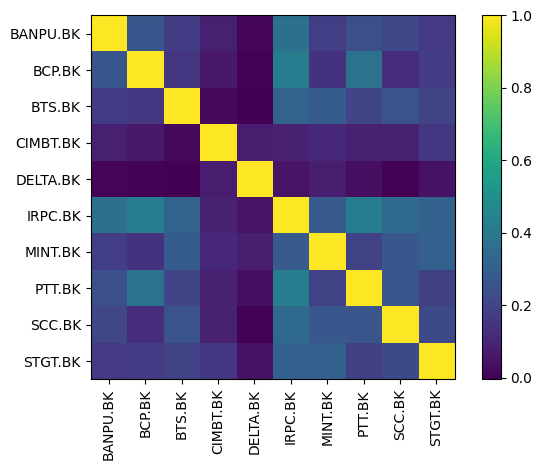

In [ ]:
plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

BANPU.BK   -0.109827
BCP.BK     -0.145908
BTS.BK     -0.095020
CIMBT.BK   -0.061133
DELTA.BK   -1.718946
IRPC.BK    -0.181899
MINT.BK    -0.153070
PTT.BK     -0.213455
SCC.BK     -0.104011
STGT.BK    -0.168226
dtype: float64

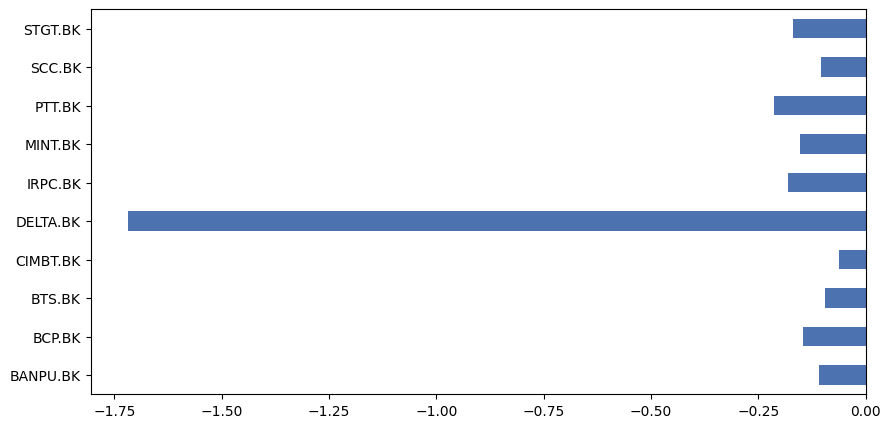

In [ ]:
market_prior.plot.barh(figsize=(10,5));

### Initial Views as ESG Score

In [ ]:
def spice_model_mapper(esg_score: float, beta: float) -> float:
  """Calulate Views (Adjust Beta using ESG Score with SPICE Model)
  Args:
    esg_score (float):
    beta (float):
  Return:
    beta_adjustment (float):
  """
  if esg_score>=85:                     # -20%
    adjust_beta = beta - (beta*0.2)
  elif esg_score>=80 and esg_score<85:  # -10%
    adjust_beta = beta - (beta*0.1)
  elif esg_score>=75 and esg_score<80:  # 0%
    adjust_beta = beta
  elif esg_score>=70 and esg_score<75:  # +10%
    adjust_beta = beta + (beta*0.1)
  elif esg_score<70:  # +20%
    adjust_beta = beta + (beta*0.2)
  return adjust_beta

In [ ]:
selected_column_list = ['Symbol', 'Refinitiv ESG']
spice_model_df = esg_score_df.sort_values(by='Refinitiv ESG', ascending=False)[selected_column_list].head(10).reset_index(drop=True)
spice_model_df['Symbol'] = spice_model_df['Symbol'].apply(lambda row: row+'.BK')
spice_model_df['Beta'] = pd.Series(betas).to_list()
spice_model_df['Adjusted Beta'] = spice_model_df.apply(lambda row: spice_model_mapper(row['Refinitiv ESG'], row['Beta']), axis=1)

# SET Performance
market_price_1 = market_prices.head(1)[0]   # 2022-10-26
market_price_2 = market_prices.tail(1)[0]   # 2023-10-26
market_performance = (market_price_2 - market_price_1)/market_price_1
spice_model_df['Market Return 1YR'] = market_performance

# Construct views (base version)
spice_model_df['New Expected Return'] = spice_model_df['Adjusted Beta'] * spice_model_df['Market Return 1YR']


# Construct views (new version)
# expected_return = risk_free_rate + (beta * market_risk_premium)
risk_free_rate = 0.012
market_risk_premium = 0.08-risk_free_rate

# Implied PER (Payout Ratio)/(Ke-g)
spice_model_df['payoutRatio'] = pd.Series(payouts).to_list()

# market_return = (market_prices / market_prices.shift(1)).dropna()
# market_risk_premium = market_return.mean() - risk_free_rate
# spice_model_df['Base Expected Return'] = risk_free_rate + (spice_model_df['Beta'] * market_risk_premium)
# spice_model_df['New Expected Return'] = risk_free_rate + (spice_model_df['Adjusted Beta'] * market_risk_premium)
spice_model_df['Base PER'] = spice_model_df['payoutRatio']/((risk_free_rate + (spice_model_df['Beta'] * market_risk_premium))-0.03)
spice_model_df['New PER'] = spice_model_df['payoutRatio']/((risk_free_rate + (spice_model_df['Adjusted Beta'] * market_risk_premium))-0.03)

In [ ]:
spice_model_df['premium'] = (spice_model_df['New PER']-spice_model_df['Base PER'])/spice_model_df['Base PER']

In [ ]:
spice_model_df

,Symbol,Refinitiv ESG,Beta,Adjusted Beta,Market Return 1YR,New Expected Return,payoutRatio,Base PER,New PER,premium
0,MINT.BK,91.16,1.118,0.8944,-0.133618,-0.119508,0.1852,3.191783,4.325163,0.355093
1,DELTA.BK,91.00,2.055,1.6440,-0.133618,-0.219668,0.3008,2.470839,3.207097,0.297979
2,SCC.BK,83.30,0.435,0.3915,-0.133618,-0.052311,0.3527,30.457686,40.906982,0.343076
3,CIMBT.BK,82.57,0.373,0.3357,-0.133618,-0.044856,0.1917,26.032048,39.709172,0.525396
4,BANPU.BK,82.57,0.998,0.8982,-0.133618,-0.120016,0.4393,8.809963,10.197875,0.157539
5,STGT.BK,82.43,0.175,0.1575,-0.133618,-0.021045,15.0000,-2459.016393,-2057.613169,-0.163237
6,BTS.BK,81.59,0.520,0.4680,-0.133618,-0.062533,7.9487,457.874424,574.992766,0.255787
7,PTT.BK,80.94,0.787,0.7083,-0.133618,-0.094642,0.7576,21.331231,25.115699,0.177414
8,IRPC.BK,80.92,1.019,0.9171,-0.133618,-0.122541,0.7200,14.037277,16.229814,0.156194
9,BCP.BK,79.43,1.151,1.1510,-0.133618,-0.153794,0.5435,9.018053,9.018053,0.000000


In [ ]:
viewdict = {row['Symbol']: row['premium'] for row in spice_model_df[['Symbol', 'premium']].to_dict('records')}

In [ ]:
# Views incoporated with ESG score
pprint(viewdict)

{'BANPU.BK': 0.15753895295931047,
 'BCP.BK': 0.0,
 'BTS.BK': 0.25578703703703687,
 'CIMBT.BK': 0.5253956417267381,
 'DELTA.BK': 0.2979785056294783,
 'IRPC.BK': 0.15619392824618827,
 'MINT.BK': 0.3550930423735143,
 'PTT.BK': 0.1774144355597988,
 'SCC.BK': 0.34307585247042466,
 'STGT.BK': -0.1632373113854595}


### BLM witout ESG

In [ ]:
# Views
viewdict = {
  "BANPU.BK": 0.1,
  "BCP.BK": 0.1,
  "BTS.BK": 0.1,
  "CIMBT.BK": 0.1,
  "DELTA.BK": 0.1,
  "IRPC.BK": 0.1,
  "MINT.BK": 0.1,
  "PTT.BK": 0.1,
  "SCC.BK": 0.1,
  "STGT.BK": 0.1
}
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
BANPU.BK,-0.109827,0.055264,0.1
BCP.BK,-0.145908,0.051708,0.1
BTS.BK,-0.095020,0.054170,0.1
CIMBT.BK,-0.061133,0.049353,0.1
DELTA.BK,-1.718946,-0.786064,0.1
IRPC.BK,-0.181899,0.050233,0.1
MINT.BK,-0.153070,0.036487,0.1
PTT.BK,-0.213455,-0.012688,0.1
SCC.BK,-0.104011,0.038419,0.1
STGT.BK,-0.168226,0.062260,0.1


In [ ]:
bl.bl_weights()

OrderedDict([('BANPU.BK', 0.4454434741318949),
             ('BCP.BK', 0.35912736953711344),
             ('BTS.BK', 0.48405362386140366),
             ('CIMBT.BK', 1.5595370594481757),
             ('DELTA.BK', -2.4090994526282885),
             ('IRPC.BK', 0.6665893516340462),
             ('MINT.BK', 0.5966630267351141),
             ('PTT.BK', -1.4167063445398118),
             ('SCC.BK', 0.5195352133466403),
             ('STGT.BK', 0.19485667847371216)])

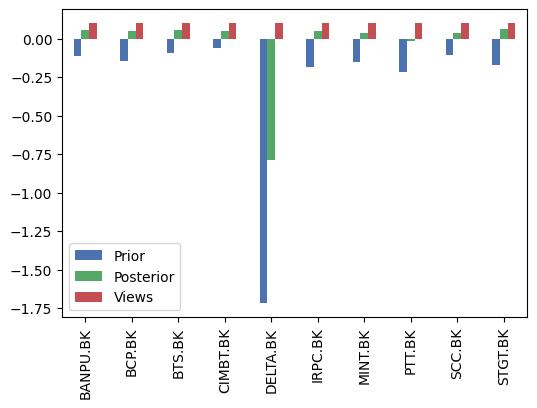

In [ ]:
rets_df.plot.bar(figsize=(6,4));

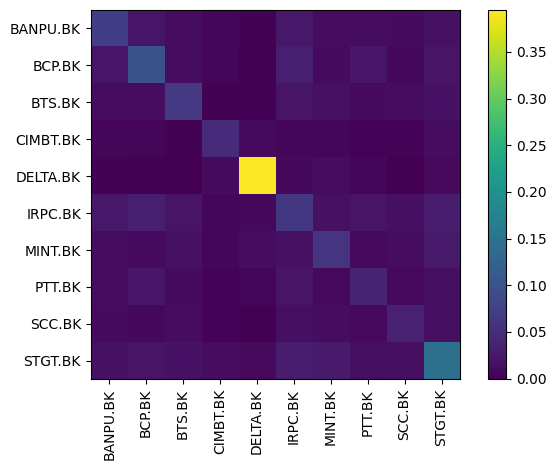

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

### BLM with ESG

In [ ]:
pprint(viewdict)
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, absolute_views=viewdict)

# confidences = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,0.7]
# bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

{'BANPU.BK': 0.15753895295931047,
 'BCP.BK': 0.0,
 'BTS.BK': 0.25578703703703687,
 'CIMBT.BK': 0.5253956417267381,
 'DELTA.BK': 0.2979785056294783,
 'IRPC.BK': 0.15619392824618827,
 'MINT.BK': 0.3550930423735143,
 'PTT.BK': 0.1774144355597988,
 'SCC.BK': 0.34307585247042466,
 'STGT.BK': -0.1632373113854595}


In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
BANPU.BK,-0.109827,0.129343,0.157539
BCP.BK,-0.145908,0.058165,0.000000
BTS.BK,-0.095020,0.170679,0.255787
CIMBT.BK,-0.061133,0.273416,0.525396
DELTA.BK,-1.718946,0.254955,0.297979
IRPC.BK,-0.181899,0.150184,0.156194
MINT.BK,-0.153070,0.221203,0.355093
PTT.BK,-0.213455,0.130972,0.177414
SCC.BK,-0.104011,0.203183,0.343076
STGT.BK,-0.168226,0.044398,-0.163237


In [ ]:
bl.bl_weights()

OrderedDict([('BANPU.BK', 0.03037584255417456),
             ('BCP.BK', -0.04259403249041799),
             ('BTS.BK', 0.0992189035777538),
             ('CIMBT.BK', 0.39450916844068495),
             ('DELTA.BK', 0.03319563869135102),
             ('IRPC.BK', 0.0080386655888443),
             ('MINT.BK', 0.17413434189485438),
             ('PTT.BK', 0.11251380386142301),
             ('SCC.BK', 0.29526768202288944),
             ('STGT.BK', -0.10466001414155755)])

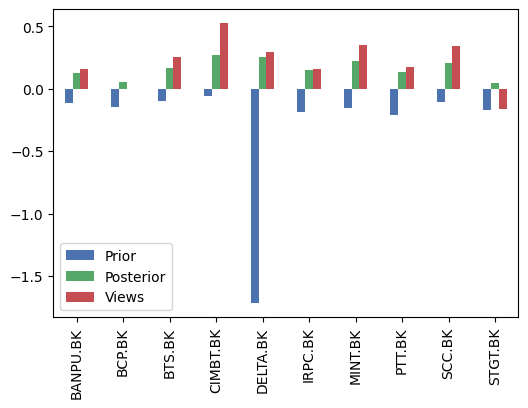

In [ ]:
rets_df.plot.bar(figsize=(6,4));

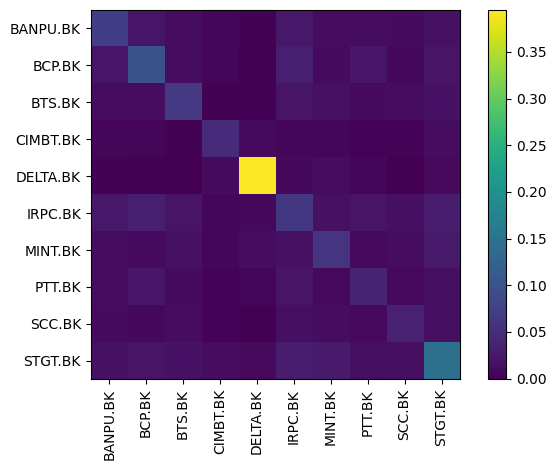

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

## Portfolio allocation without ESG

In [ ]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('BANPU.BK', 0.15132),
             ('BCP.BK', 0.13044),
             ('BTS.BK', 0.14882),
             ('CIMBT.BK', 0.13458),
             ('DELTA.BK', 0.0),
             ('IRPC.BK', 0.1235),
             ('MINT.BK', 0.06397),
             ('PTT.BK', 0.0),
             ('SCC.BK', 0.07844),
             ('STGT.BK', 0.16894)])

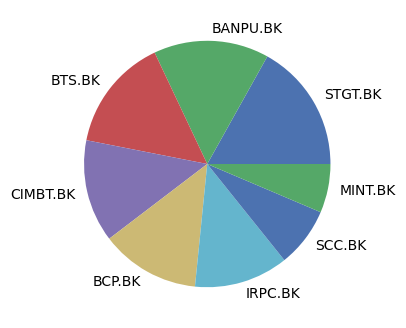

In [ ]:
pd.Series(weights).sort_values(ascending=False).plot.pie(figsize=(4,4));

In [ ]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=20000)  # Initial capital
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Leftover: ${leftover:.2f}")
alloc

Funds remaining: 34.12
BANPU.BK: allocated 0.152, desired 0.151
BCP.BK: allocated 0.131, desired 0.130
BTS.BK: allocated 0.149, desired 0.149
CIMBT.BK: allocated 0.135, desired 0.135
DELTA.BK: allocated 0.000, desired 0.000
IRPC.BK: allocated 0.124, desired 0.123
MINT.BK: allocated 0.065, desired 0.064
PTT.BK: allocated 0.000, desired 0.000
SCC.BK: allocated 0.073, desired 0.078
STGT.BK: allocated 0.170, desired 0.169
Allocation has RMSE: 0.002
Leftover: $34.12


{'BANPU.BK': 407,
 'BCP.BK': 66,
 'BTS.BK': 403,
 'CIMBT.BK': 4577,
 'IRPC.BK': 1270,
 'MINT.BK': 46,
 'SCC.BK': 5,
 'STGT.BK': 574}

## Portfolio allocation with ESG

In [ ]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('BANPU.BK', 0.07601),
             ('BCP.BK', 0.01867),
             ('BTS.BK', 0.11002),
             ('CIMBT.BK', 0.1973),
             ('DELTA.BK', 0.13652),
             ('IRPC.BK', 0.08945),
             ('MINT.BK', 0.1489),
             ('PTT.BK', 0.08065),
             ('SCC.BK', 0.14024),
             ('STGT.BK', 0.00223)])

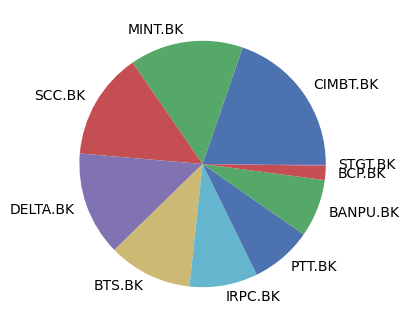

In [ ]:
pd.Series(weights).sort_values(ascending=False).plot.pie(figsize=(4,4));

In [ ]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=20000)
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Leftover: ${leftover:.2f}")
alloc

Funds remaining: 1.20
BANPU.BK: allocated 0.076, desired 0.076
BCP.BK: allocated 0.018, desired 0.019
BTS.BK: allocated 0.110, desired 0.110
CIMBT.BK: allocated 0.197, desired 0.197
DELTA.BK: allocated 0.133, desired 0.137
IRPC.BK: allocated 0.089, desired 0.089
MINT.BK: allocated 0.148, desired 0.149
PTT.BK: allocated 0.080, desired 0.081
SCC.BK: allocated 0.147, desired 0.140
STGT.BK: allocated 0.001, desired 0.002
Allocation has RMSE: 0.002
Leftover: $1.20


{'BANPU.BK': 203,
 'BCP.BK': 9,
 'BTS.BK': 297,
 'CIMBT.BK': 6685,
 'DELTA.BK': 35,
 'IRPC.BK': 915,
 'MINT.BK': 105,
 'PTT.BK': 48,
 'SCC.BK': 10,
 'STGT.BK': 5}

## Back Testing - Port with ESG